# Homework 3
Integrantes del grupo: 
<br>
Andrés Bohórquez - Código: 00320727
<br>
Gian Tituaña - Código: 00325991

## **Part 1: Research and Analysis of DDoS Attack Techniques (Unchanged)**

**Objective:** Students will conduct in-depth research on the common methods used to execute Distributed Denial of Service (DDoS) attacks, focusing on the layers of the OSI model they target and how they operate.

---

* **Task A: Categorization and Description**
  Research and define the three primary categories of DDoS attacks (Volumetric, Protocol, Application Layer). For each category, describe its goal and provide at least two specific attack examples. Present your findings in a comparison table.
---

A continuación se presenta una comparación de las tres categorías principales de ataques DDoS, indicando las capas del modelo OSI que impactan, su objetivo principal y dos ejemplos específicos para cada una.

| DDoS Category        | OSI Layer(s) Targeted | Primary Goal of Attack                                                                 | Specific Attack Example 1 | Specific Attack Example 2   |
|----------------------|------------------------|----------------------------------------------------------------------------------------|---------------------------|-----------------------------|
| **Volumetric**       | L3, L4                | Saturar el ancho de banda disponible generando un volumen masivo de tráfico basura que impide el paso del tráfico legítimo. | **UDP Flood**             | **DNS Amplification**       |
| **Protocol**         | L3, L4                | Explotar debilidades en los protocolos de red para agotar tablas de estado, recursos del sistema o mecanismos de manejo de conexiones. | **SYN Flood**             | **ICMP (Ping) Flood**       |
| **Application Layer**| L7                    | Atacar directamente la aplicación o servicio (por ejemplo, HTTP) imitando tráfico legítimo pero a gran escala o de forma maliciosa para consumir recursos del servidor. | **HTTP Flood**            | **Slowloris**               |

- **Volumetric**: Este tipo de ataque busca generar una cantidad enorme de tráfico hacia el objetivo, normalmente desde múltiples fuentes distribuidas. El propósito es consumir completamente el ancho de banda entre la víctima y su proveedor de servicios, de modo que el tráfico legítimo no pueda llegar. Ejemplos típicos son los **UDP Flood**, donde se envían paquetes UDP a puertos aleatorios, y los ataques de **DNS Amplification**, que aprovechan servidores DNS abiertos para multiplicar el volumen de tráfico enviado a la víctima.

- **Protocol**: Estos ataques se enfocan en las capas de red y transporte, explotando cómo los protocolos (como TCP o ICMP) gestionan el estado de las conexiones y los recursos. En un **SYN Flood**, por ejemplo, el atacante envía muchas solicitudes SYN sin completar el three-way handshake, llenando la tabla de conexiones semiabiertas del servidor. En un **ICMP/Ping Flood**, se envía una gran cantidad de paquetes ICMP para sobrecargar la capacidad de respuesta del sistema.

- **Application Layer**: Los ataques de capa de aplicación (L7) se dirigen a servicios concretos (como servidores web) y suelen parecerse mucho al tráfico legítimo, lo que los hace más difíciles de detectar. En un **HTTP Flood**, el atacante envía un gran número de peticiones HTTP GET/POST para consumir CPU, memoria y recursos de la aplicación. En **Slowloris**, el atacante mantiene muchas conexiones HTTP abiertas enviando cabeceras muy lentamente, manteniendo ocupado al servidor con sesiones que nunca terminan.

---


* **Task B: In-Depth Attack Profile**
  Choose one specific attack from your table (e.g., DNS Amplification) and write a detailed profile (250-350 words) that explains its Mechanism, the Resource Exhaustion it causes, and how Botnets/Amplification are used.
---

DNS Amplification es un tipo de ataque DDoS volumétrico que aprovecha servidores DNS mal configurados, conocidos como open resolvers, para amplificar la cantidad de tráfico dirigido a una víctima. El atacante envía consultas DNS relativamente pequeñas a estos servidores, pero falsifica (spoofing) la dirección IP de origen para que parezca que la petición proviene de la víctima. Cuando el servidor DNS responde, no envía la respuesta al atacante, sino directamente a la dirección IP suplantada, es decir, al objetivo del ataque. Además, el atacante suele enviar peticiones diseñadas para generar respuestas grandes, por ejemplo solicitando todos los registros de un dominio (ANY queries), lo que incrementa aún más la amplificación.

En términos de agotamiento de recursos (**Resource Exhaustion**), el principal objetivo de DNS Amplification es saturar el ancho de banda disponible hacia la víctima y hacia su proveedor de servicios. Un flujo constante de respuestas DNS de gran tamaño puede llenar por completo la capacidad del enlace de red, provocando que otros paquetes legítimos sean descartados o sufran retrasos significativos. Este volumen de tráfico también puede afectar a equipos intermedios, como routers y firewalls, que deben procesar o filtrar cada paquete, llegando a consumir sus recursos de CPU y memoria. Como consecuencia, los usuarios legítimos experimentan lentitud extrema o la total indisponibilidad del servicio afectado.

La efectividad de este ataque aumenta considerablemente cuando se combina con una botnet. En lugar de un solo equipo atacante, una red de dispositivos comprometidos (PCs, cámaras IP, routers domésticos, etc.) puede generar consultas DNS desde múltiples orígenes distribuidos. Cada bot envía solicitudes a diversos servidores DNS abiertos, lo que multiplica el número de respuestas enviadas a la víctima. Gracias a la relación de amplificación, un volumen relativamente pequeño de tráfico saliente desde la botnet se traduce en un caudal de datos mucho mayor dirigido al objetivo. Esta combinación de distribución (botnet) y amplificación (respuestas DNS de gran tamaño) hace que DNS Amplification sea un ataque muy potente y difícil de mitigar sin contar con filtrado en la red del proveedor y buenas prácticas de configuración en los servidores DNS.

---

**Referencias**

Cloudflare. (s. f.). *What is a DDoS attack?* Cloudflare. Recuperado el 28 de noviembre de 2025, de https://www.cloudflare.com/learning/ddos/what-is-a-ddos-attack/

Cloudflare. (s. f.). *DNS amplification attacks*. Cloudflare. Recuperado el 28 de noviembre de 2025, de https://www.cloudflare.com/learning/ddos/dns-amplification-ddos-attack/

Imperva. (s. f.). *Slowloris DDoS attack*. Imperva. Recuperado el 28 de noviembre de 2025, de https://www.imperva.com/learn/ddos/slowloris/

OWASP Foundation. (s. f.). *Denial of service (DoS) cheat sheet*. OWASP Cheat Sheet Series. Recuperado el 28 de noviembre de 2025, de https://cheatsheetseries.owasp.org/cheatsheets/Denial_of_Service_Cheat_Sheet.html

OpenAI. (2025). *ChatGPT (versión GPT-5.1 Preview) [Modelo de lenguaje grande]*. OpenAI. https://chat.openai.com/

---


## **Part 2: Hands-On: DVWA Deployment and Common Attacks**

**Objective:** Students will deploy a vulnerable web application using Docker and execute common web attacks in a safe, controlled environment, learning to bypass **basic** security measures.

**⚠️ Ethical Warning:** This task is for **educational, local simulation only**. Students are **strictly forbidden** from attempting these attacks on any public, external, or third-party web resource.

---

* **Task A: DVWA Installation via Docker**  
  1. Ensure **Docker** is installed and running on your local machine.  
  2. Pull and run the Damn Vulnerable Web Application (DVWA) using a public Docker image (e.g., vulnerables/web-dvwa or citizenstig/dvwa). You will need to map a local port (e.g., port 80) to the container's web server.  
     **Example Command:** docker run --rm -it -p 80:80 vulnerables/web-dvwa  
  3. Access the DVWA login page at http://localhost/ (or your mapped port). Log in with the default credentials (admin/password) and complete the database setup.  
  4. **Submission:** Provide the exact Docker command(s) you used to pull and run the container, and a screenshot of the DVWA home page.  
---

### 1. Verificación de Docker

Antes de iniciar, se verificó que Docker estuviera instalado y ejecutándose correctamente en el sistema Windows. Para ello, se utilizaron los siguientes comandos en PowerShell:

```powershell
docker --version
docker ps
```

Estas órdenes permiten comprobar que el binario de Docker está disponible y que el daemon está en ejecución.

---

### 2. Descarga de la imagen de DVWA

Se descargó la imagen pública oficial de DVWA desde Docker Hub utilizando el siguiente comando:

```powershell
docker pull vulnerables/web-dvwa
```

Este comando obtiene la última versión disponible de la imagen `vulnerables/web-dvwa` y la almacena localmente para su posterior ejecución.

---

### 3. Ejecución del contenedor DVWA (puerto 80:80)

A continuación, se inició un contenedor basado en la imagen descargada, mapeando el puerto 80 del contenedor al puerto 80 de la máquina local:

```powershell
docker run --rm -it -p 80:80 vulnerables/web-dvwa
```

Explicación de parámetros relevantes:
- `--rm`: elimina el contenedor automáticamente cuando se detiene.
- `-it`: permite una sesión interactiva y ver los logs en la terminal.
- `-p 80:80`: mapea el puerto 80 del host al puerto 80 del contenedor.
- `vulnerables/web-dvwa`: nombre de la imagen de DVWA.

![Logs del contenedor levantado.png](<attachment:Logs del contenedor levantado.png>)

---

### 4. Acceso a la interfaz web de DVWA

Con el contenedor en ejecución, se accedió a la aplicación DVWA desde el navegador utilizando la siguiente URL:

```text
http://localhost/
```

Al abrir esta dirección, se mostró la página de inicio de sesión de DVWA.

![Página login.png](<attachment:Página login.png>)

---

### 5. Configuración inicial de la base de datos DVWA

Una vez en la aplicación, se realizó el proceso de configuración de la base de datos:

1. Iniciar sesión con las credenciales por defecto:
   - **Username:** `admin`
   - **Password:** `password`
2. Navegar a la sección **Setup/Database** (o el enlace de "Create / Reset Database").
3. Hacer clic en el botón para **crear o resetear la base de datos**.
4. Verificar el mensaje de éxito indicando que la base de datos ha sido creada correctamente.

![Página previa al create reset database.png](<attachment:Página previa al create reset database.png>)

---

### 6. Acceso a la página principal de DVWA

Tras completar la configuración de la base de datos, se volvió a la página de login, se ingresaron nuevamente las credenciales por defecto y, al autenticarse correctamente, se mostró la página principal de DVWA con el menú de vulnerabilidades disponible.

![Página con la DB creada.png](<attachment:Página con la DB creada.png>)

---

### 7. Resumen de comandos utilizados

Para referencia, los comandos de Docker utilizados en la Task A fueron:

```powershell
# Verificación de Docker
docker --version
docker ps

# Descarga de la imagen DVWA
docker pull vulnerables/web-dvwa

# Ejecución del contenedor DVWA en el puerto 80 del host
docker run --rm -it -p 80:80 vulnerables/web-dvwa
```

Este procedimiento permitió desplegar DVWA de forma local utilizando Docker, cumpliendo con los requisitos de la Task A de la Parte 2 del deber de seguridad web.

---
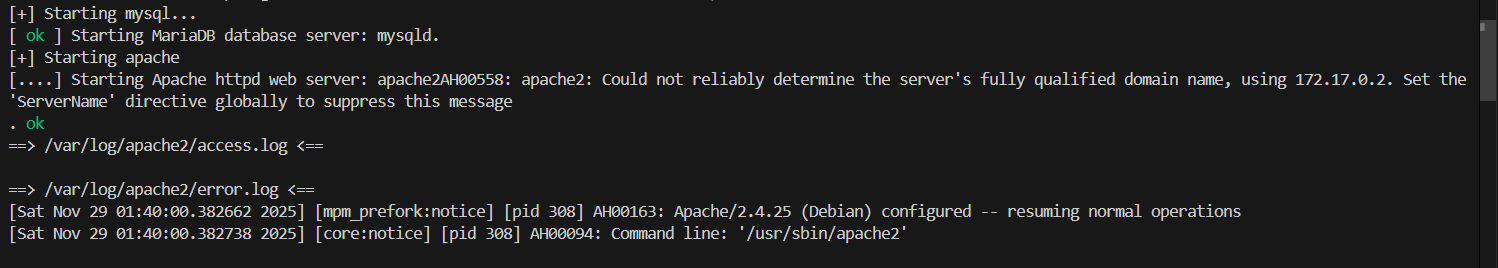
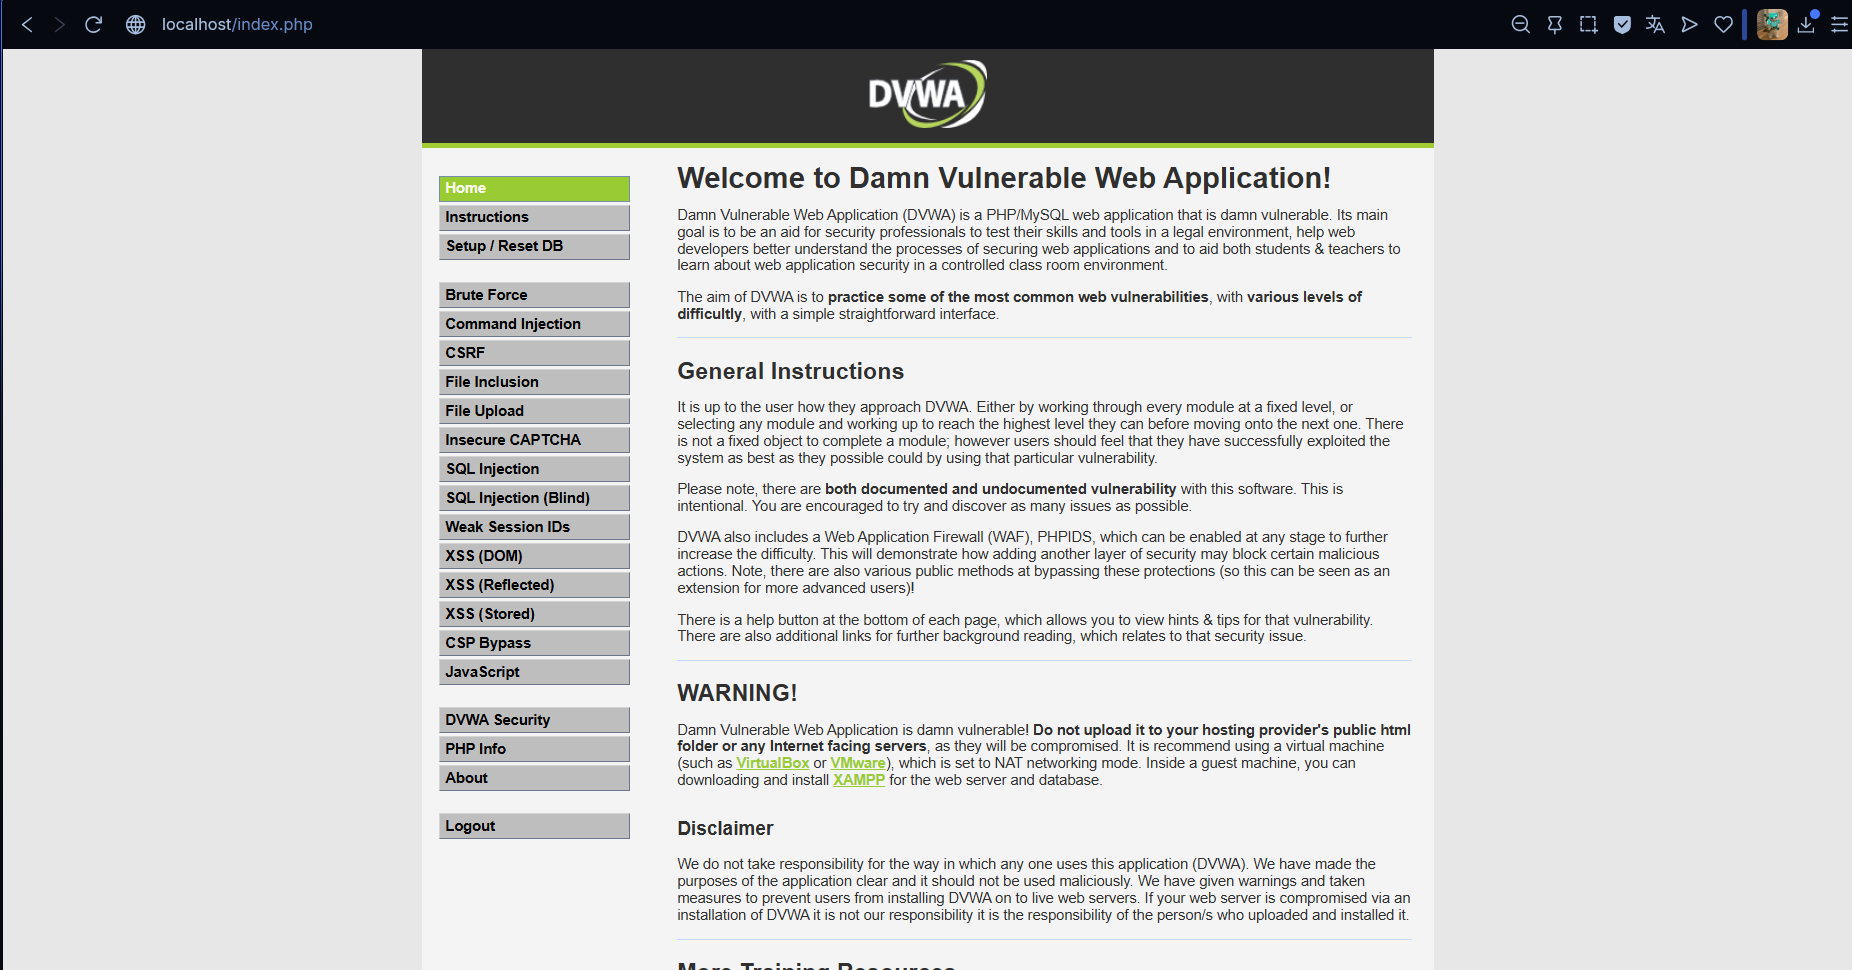
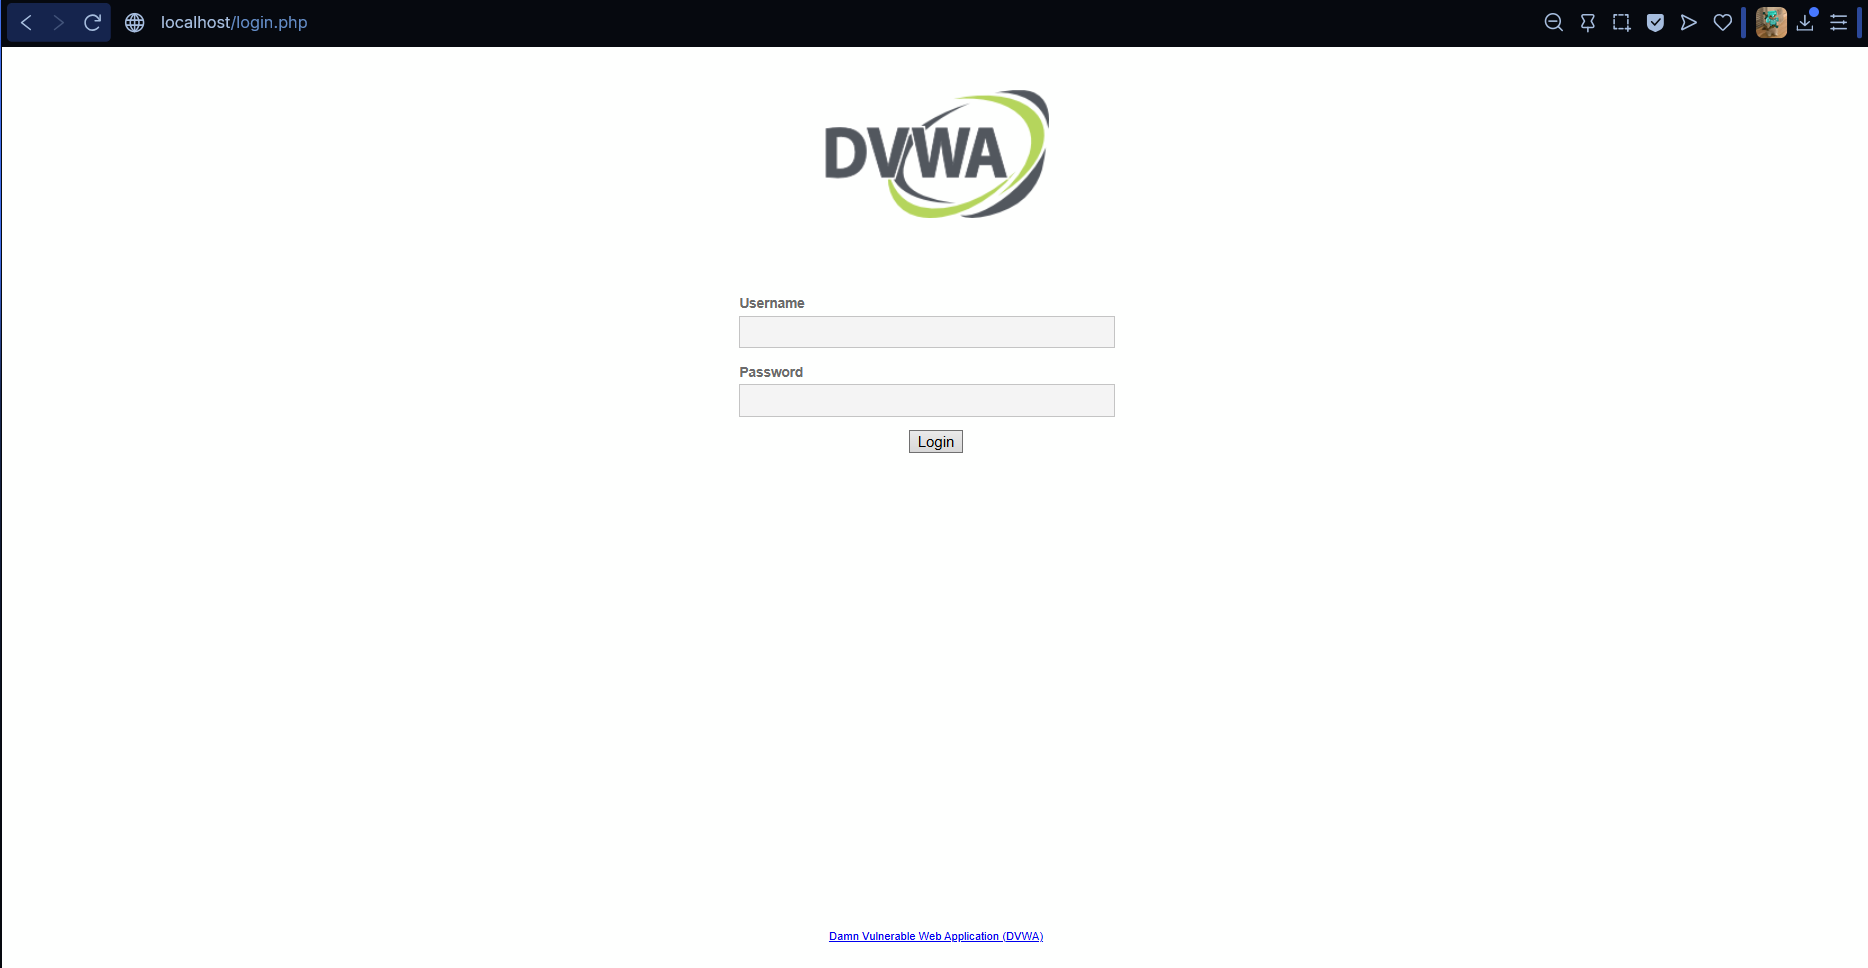
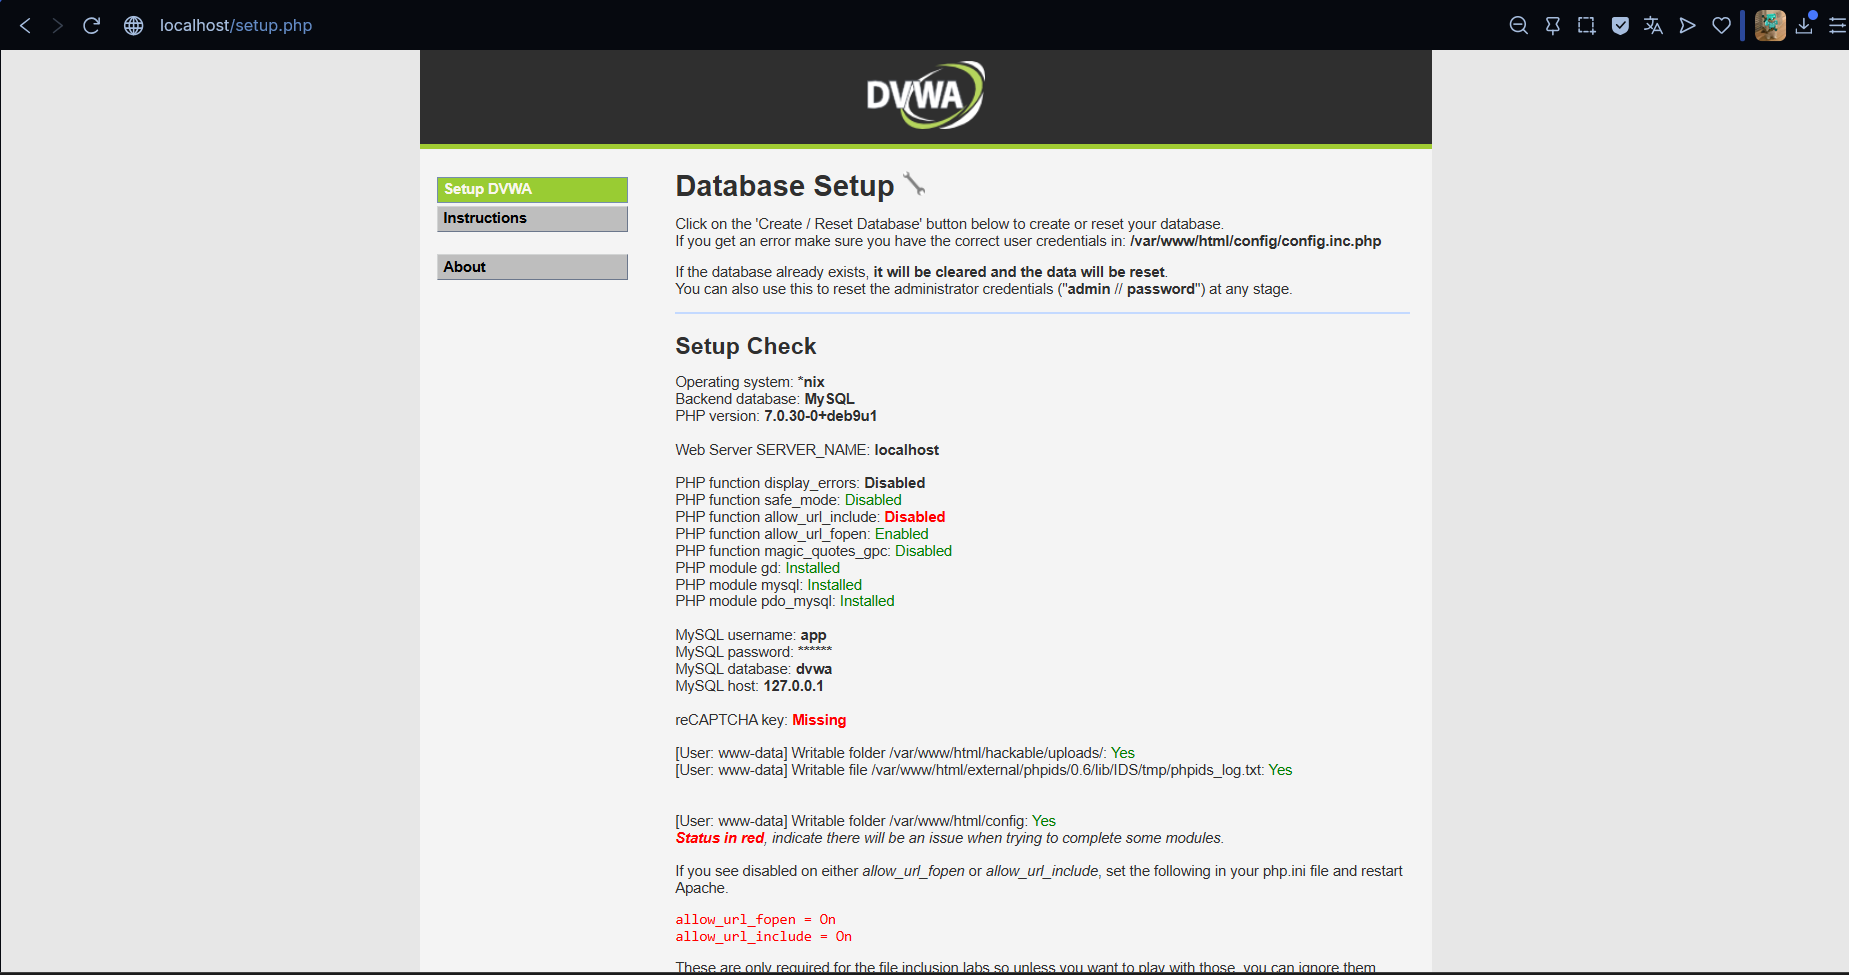

* **Task B: Attack Execution and Documentation (Medium Security)**  
  1. Set the DVWA security level to **Medium**. This level often includes functions like mysql\_real\_escape\_string() for SQLi, or basic string replacement for XSS, requiring students to look for weaknesses like lack of case sensitivity or incomplete filtering.  
  2. Successfully execute **three** distinct common web application attacks using the DVWA menu options. Focus on vulnerabilities from the **OWASP Top 10**:  
     * **SQL Injection (SQLi)**: You may need to use **time-based blind techniques** or other bypasses since the standard UNION attack may be sanitized.  
     * **Cross-Site Scripting (XSS)**: You may need to bypass basic input filters by using different encodings, event handlers, or mixed-case tags.  
     * **Command Injection**: Look for ways to bypass filtering of commands like | or & by using other command separators (e.g., &&, ||, or \\n).  
  3. For each of the three attacks, provide:  
     * The **Vulnerability Name** (e.g., SQL Injection).  
     * The **Payload** used (the malicious input string).  
     * A **Screenshot** of the successful exploitation (e.g., the alert box for XSS, or the SQL query result for SQLi).  
     * A **brief explanation** (1-2 sentences) of *why* the attack payload needed to be modified to bypass the Medium security filter.

---

**Vulnerability Name** : SQL Injection (SQLi)

 **Payload** : `1 OR 1=1#`

 **Screenshot**

 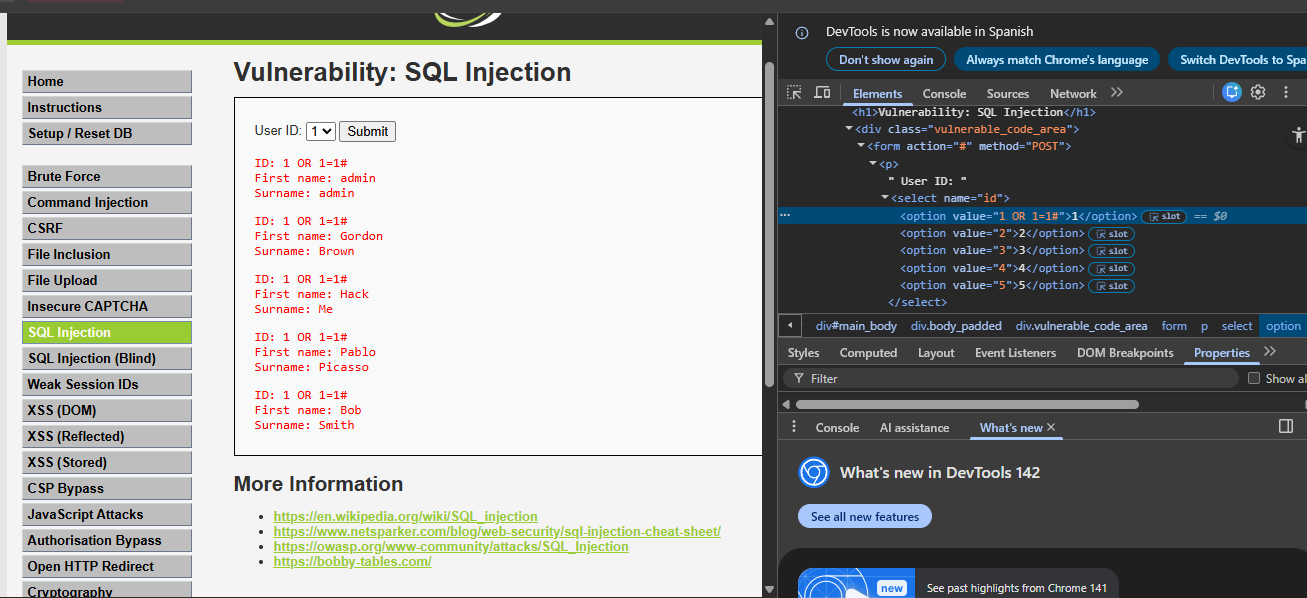

 **Brief explanation**

 De acuerdo a como se realiza la consulta se sabe que el valor del id se extrae directamente de la caja de opciones entonces basta con cambiar una de las opciones por "1 OR 1=1#" para que la condición siempre se cumpla y pueda retornar todos los usuarios.
 
 ---

**Vulnerability Name** : Cross-Site Scripting (XSS DOM)

 **Payload** : En el navegador colocamos http://127.0.0.1:4280/vulnerabilities/xss_d/?default=English%3E%3C/option%3E%3C/select%3E%3Cimg%20src=%27x%27%20onerror=%27alert(document.cookie)%27%3E 

 **Screenshot**

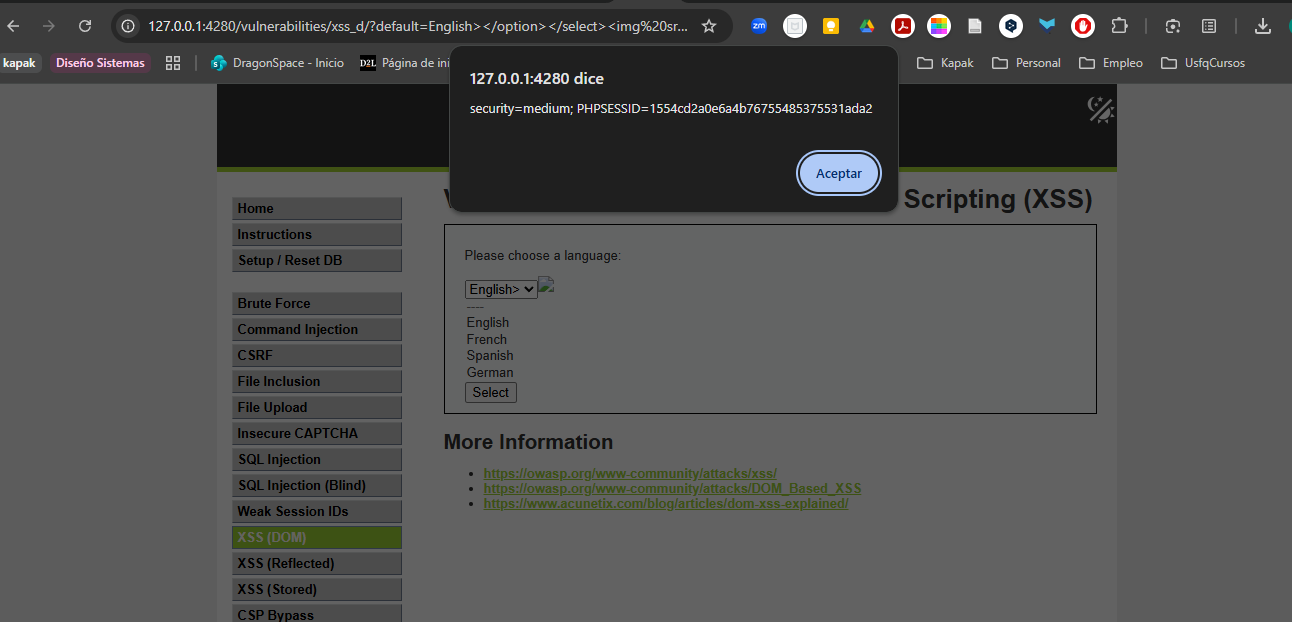

 **Brief explanation**

El filtro de seguridad en nivel Medium de DVWA suele buscar y bloquear la etiqueta  `<script>`. El payload funciona porque se usa una etiqueta pasiva `<img>` que ejecuta código JavaScript a través de un controlador de eventos (onerror).


 ---


**Vulnerability Name** : Command Injection

 **Payload** : `127.0.0.1 | echo $(whoami) @ $(hostname)`

 **Screenshot**

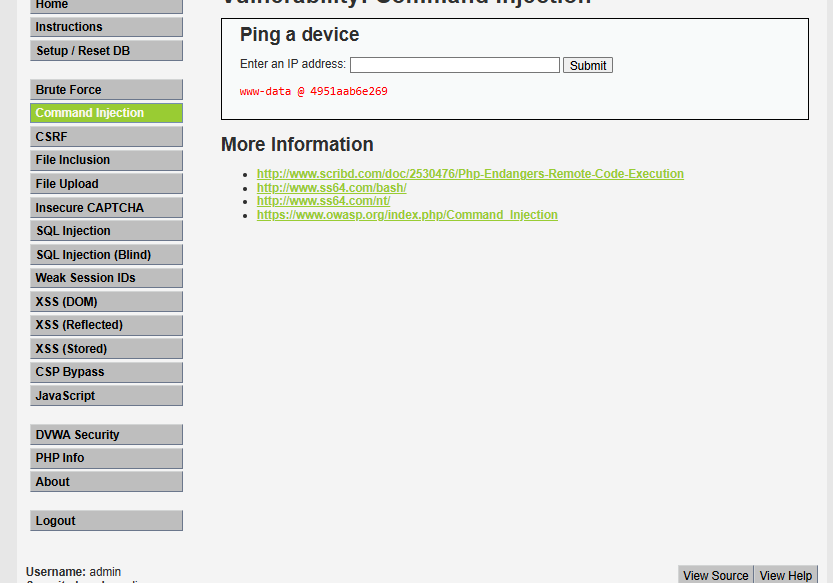

 **Brief explanation**

La aplicación filtra "&&" y ";" para evitar concatenar comandos, pero no lo hace con el pipe "|", así podemos conectar comandos con este operador y funcionará.

---



## **Part 3: Defensive Installation: Web Application Firewall (WAF)** 

**Objective:** Students will install a reverse proxy and WAF solution to understand the defensive mechanisms required to block the attacks performed in Part 2\.

* **Task A: WAF Deployment**  
  1. Research and select an **open-source Web Application Firewall (WAF)** solution that can be run as a reverse proxy, such as **ModSecurity** (often used with Nginx/Apache) or **BunkerWeb** (Docker-friendly).  
  2. Install and configure your chosen WAF to sit **in front of** the running DVWA container.  
  3. Ensure the WAF is configured with a default rule set (e.g., the **OWASP Core Rule Set (CRS)** for ModSecurity, if applicable).  

---

- Se seleccionó ModSecurity como WAF open-source, ejecutándose con Nginx en el contenedor owasp/modsecurity-crs:nginx-alpine.
- El WAF está configurado como reverse proxy delante del contenedor DVWA, redirigiendo el tráfico hacia la aplicación vulnerable.
- ModSecurity utiliza la OWASP Core Rule Set (CRS) por defecto, con reglas activadas y parámetros de seguridad definidos en las variables de entorno del contenedor.
  
**Código del compose**
```
version: '3.8'

services:
  dvwa:
    image: vulnerables/web-dvwa
    container_name: dvwa-app
    networks:
      - dvwa-network

  waf:
    image: owasp/modsecurity-crs:nginx-alpine
    container_name: modsecurity-waf
    ports:
      - "80:8080"
    depends_on:
      - dvwa
    environment:
      - BACKEND=http://dvwa:80
      - PROXY=1
      - MODSEC_RULE_ENGINE=On
      - PARANOIA=2
      - ANOMALY_INBOUND=5
      - ANOMALY_OUTBOUND=4
      - PORT=8080
      - SSL_PORT=8443
    volumes:
      - ./waf-logs:/var/log/nginx
    networks:
      - dvwa-network

networks:
  dvwa-network:
    driver: bridge
```
**Contenedores ejecutándose** 

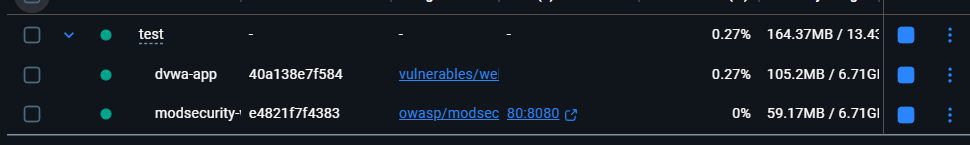

---
* **Task B: Defense Testing and Analysis**  
  1. Attempt to execute the **same three attack payloads** from Part 2 *through* the WAF proxy.  
  2. For each payload, document the result: Did the WAF **successfully block** the attack? What **HTTP Status Code** or **Error Message** did the WAF return?  
  3. Locate the WAF's security log and identify the **Rule ID** (if applicable) that triggered the block for at least one of the attacks.  
  4. **Submission:**  
     * The name of the WAF solution installed.  
     * A diagram or detailed explanation of your network setup (WAF $\\rightarrow$ DVWA).  
     * A screenshot of the WAF blocking one of the attack attempts.  
     * An analysis (150-200 words) of the difference between an **Application Layer attack (L7)** you performed (like SQLi) and the **DDoS Application Layer attack** researched in Part 1 (like HTTP Flood).

---

**Vulnerability Name** : SQL Injection (SQLi)

 **Payload** : `1 OR 1=1#`

**Bloqueo** 

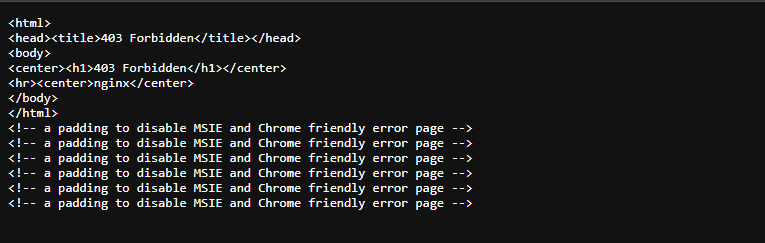

**Logs** 



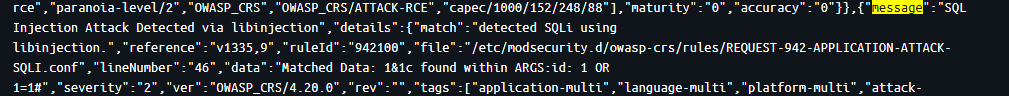

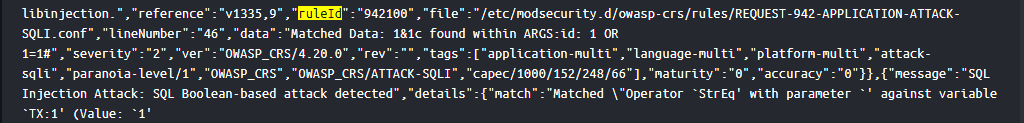

---

**Vulnerability Name** : Cross-Site Scripting (XSS DOM)

**Payload** : En el navegador colocamos http://localhost/vulnerabilities/xss_d/?default=English%3E%3C/option%3E%3C/select%3E%3Cimg%20src=%27x%27%20onerror=%27alert(document.cookie)%27%3E

**Bloqueo** 

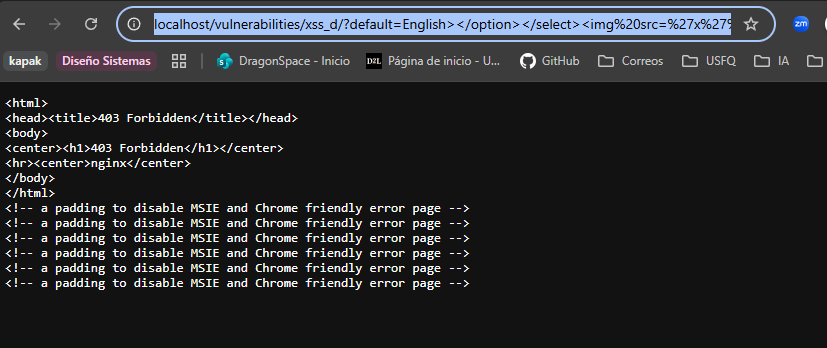
 
**Logs** 

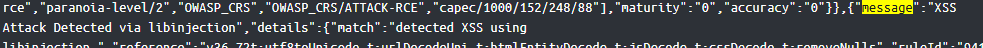



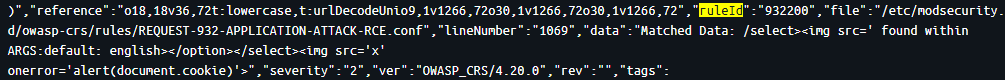

---
**Vulnerability Name** : Command Injection

**Payload** : `127.0.0.1 | echo $(whoami) @ $(hostname)`

**Bloqueo** 
 
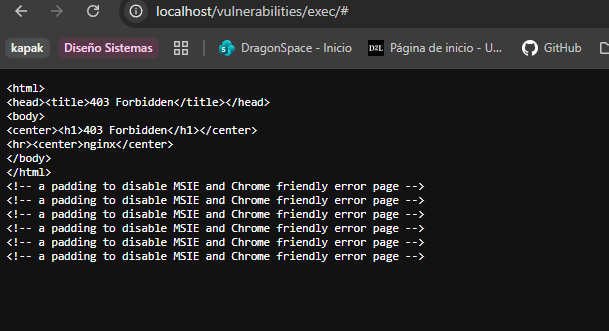

**Logs** 

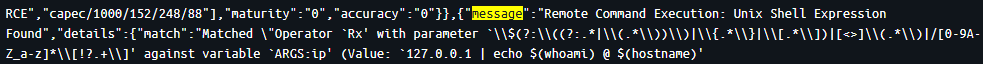



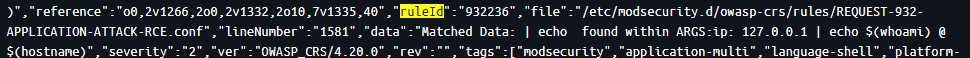

---

**WAF solution**: ModSecurity como WAF open-source.

**Diagram**

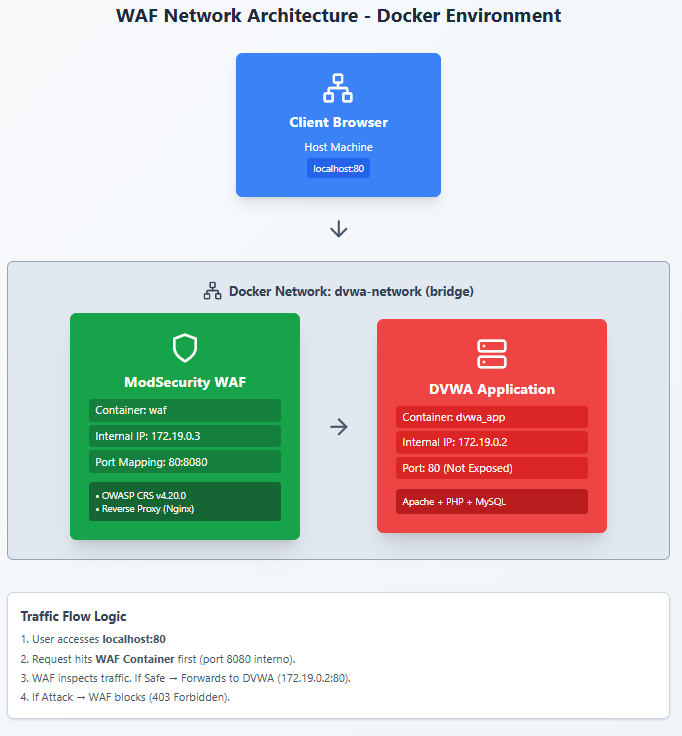

**WAF blocking an attack**

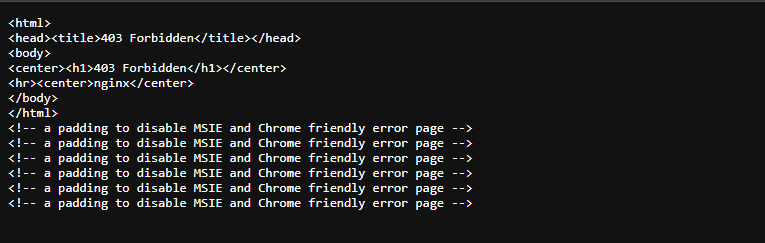

**Analysis**

El ataque de SQL Injection atacó la lógica de la aplicación en la Capa 7, explotando una validación de entrada insuficiente en las consultas a la base de datos. Utilizando el payload 1 OR 1=1#, el ataque intentó manipular la sentencia SQL para evadir la autenticación o extraer datos no autorizados. Este es un ataque dirigido y de bajo volumen, enfocado en comprometer la integridad y confidencialidad de los datos mediante una única solicitud maliciosa.

HTTP Flood por el contrario es un ataque DDoS volumétrico de Capa 7 que satura el servidor de aplicaciones con una cantidad masiva de solicitudes HTTP aparentemente legítimas. En lugar de explotar una vulnerabilidad de código, agota los recursos del servidor (CPU, memoria, conexiones) mediante el volumen bruto de tráfico, provocando que el servicio no esté disponible para los usuarios legítimos.